In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns #for background style for plots
from matplotlib.pyplot import figure #plot size
import matplotlib.style #Setting the theme of your plots

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Collection

In [36]:
data=pd.read_csv("TRAIN.csv")
print(data.shape)
data.head()

(1401, 16)


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


# EDA & Preprocessing

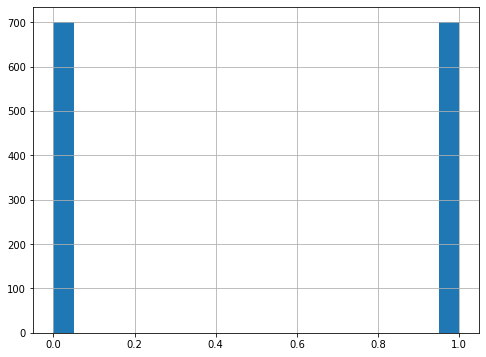

In [37]:
data['Churn Status'].hist(bins =20, figsize =(8,6))

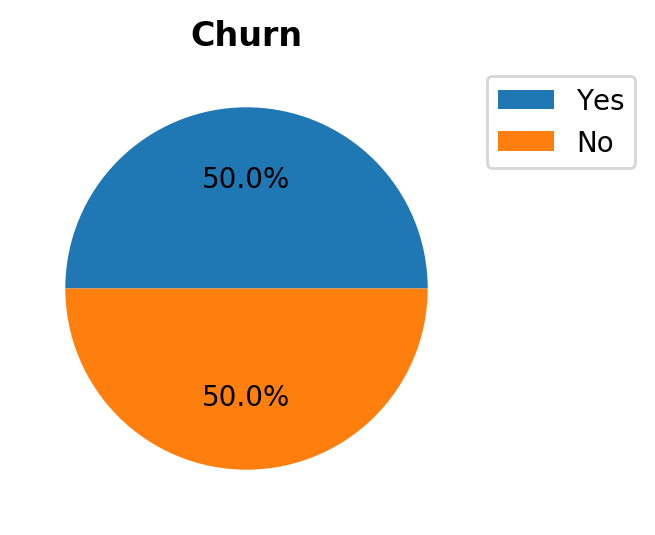

In [38]:
#Pie Chart
#Calculating Churn Percentage
yes=len(data[data['Churn Status']==1.0])
no=len(data[data['Churn Status']==0.0])
tot=len(data)

yes=(yes/tot)*100
no=(no/tot)*100

Churn_Perc=[yes,no]
figure(num=None, figsize=(5, 3), dpi=200)
plt.pie(Churn_Perc,autopct='%1.1f%%')
plt.title("Churn",weight="bold")
labels=['Yes','No']
plt.legend(labels,bbox_to_anchor=(1, 1))
plt.show()

Exactly it is balanced data

In [39]:
data.columns=data.columns.str.replace(' ', '')

In [40]:
data.columns

Index(['CustomerID', 'network_age', 'Customertenureinmonth',
       'TotalSpendinMonths1and2of2017', 'TotalSMSSpend', 'TotalDataSpend',
       'TotalDataConsumption', 'TotalUniqueCalls', 'TotalOnnetspend',
       'TotalOffnetspend', 'TotalCallcentrecomplaintcalls',
       'NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2',
       'MostLovedCompetitornetworkininMonth1',
       'MostLovedCompetitornetworkininMonth2', 'ChurnStatus'],
      dtype='object')

In [41]:
data.describe()

,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,ChurnStatus
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000


In [42]:
data.dtypes

CustomerID                               object
network_age                             float64
Customertenureinmonth                   float64
TotalSpendinMonths1and2of2017           float64
TotalSMSSpend                           float64
TotalDataSpend                          float64
TotalDataConsumption                    float64
TotalUniqueCalls                        float64
TotalOnnetspend                         float64
TotalOffnetspend                        float64
TotalCallcentrecomplaintcalls           float64
NetworktypesubscriptioninMonth1          object
NetworktypesubscriptioninMonth2          object
MostLovedCompetitornetworkininMonth1     object
MostLovedCompetitornetworkininMonth2     object
ChurnStatus                             float64
dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 16 columns):
CustomerID                              1400 non-null object
network_age                             1400 non-null float64
Customertenureinmonth                   1400 non-null float64
TotalSpendinMonths1and2of2017           1400 non-null float64
TotalSMSSpend                           1400 non-null float64
TotalDataSpend                          1400 non-null float64
TotalDataConsumption                    1400 non-null float64
TotalUniqueCalls                        1400 non-null float64
TotalOnnetspend                         1400 non-null float64
TotalOffnetspend                        1400 non-null float64
TotalCallcentrecomplaintcalls           1400 non-null float64
NetworktypesubscriptioninMonth1         1225 non-null object
NetworktypesubscriptioninMonth2         1256 non-null object
MostLovedCompetitornetworkininMonth1    1399 non-null object
MostLovedCompetitornetworkini

In [45]:
#Missing Values identifying

data.isnull().sum()

CustomerID                                1
network_age                               1
Customertenureinmonth                     1
TotalSpendinMonths1and2of2017             1
TotalSMSSpend                             1
TotalDataSpend                            1
TotalDataConsumption                      1
TotalUniqueCalls                          1
TotalOnnetspend                           1
TotalOffnetspend                          1
TotalCallcentrecomplaintcalls             1
NetworktypesubscriptioninMonth1         176
NetworktypesubscriptioninMonth2         145
MostLovedCompetitornetworkininMonth1      2
MostLovedCompetitornetworkininMonth2      2
ChurnStatus                               1
dtype: int64

Remove remaining null values


In [46]:
data=data.dropna()
data.isnull().sum()

CustomerID                              0
network_age                             0
Customertenureinmonth                   0
TotalSpendinMonths1and2of2017           0
TotalSMSSpend                           0
TotalDataSpend                          0
TotalDataConsumption                    0
TotalUniqueCalls                        0
TotalOnnetspend                         0
TotalOffnetspend                        0
TotalCallcentrecomplaintcalls           0
NetworktypesubscriptioninMonth1         0
NetworktypesubscriptioninMonth2         0
MostLovedCompetitornetworkininMonth1    0
MostLovedCompetitornetworkininMonth2    0
ChurnStatus                             0
dtype: int64

In [47]:
data.shape

(1202, 16)

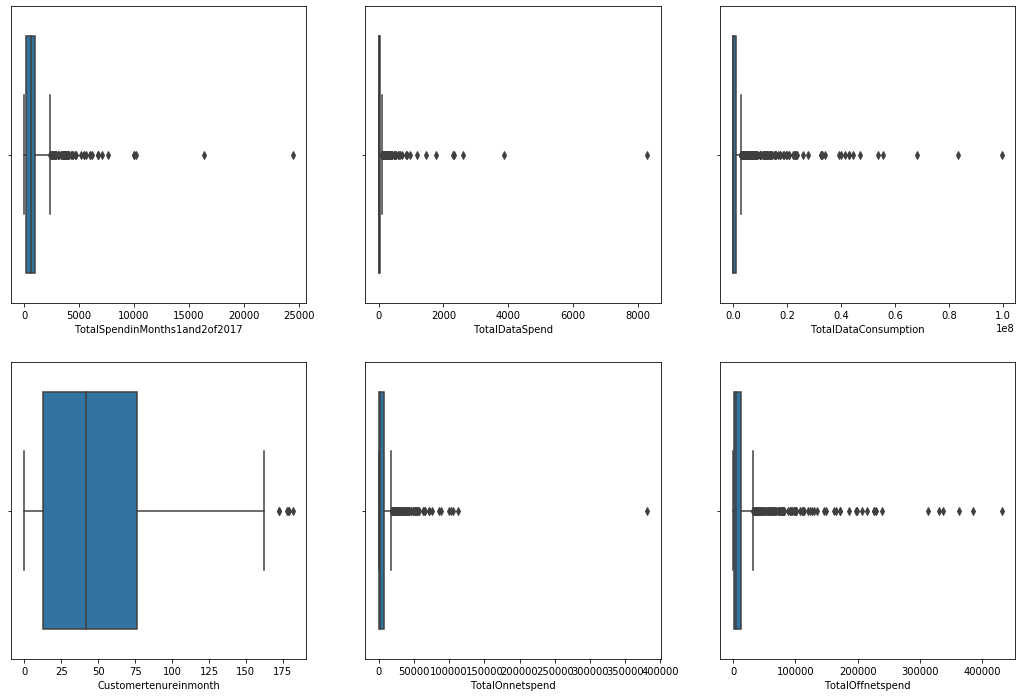

In [48]:
#Outlier Identification 

fig, axs = plt.subplots(2,3, figsize = (18,12))

sns.boxplot(data['TotalSpendinMonths1and2of2017'], ax = axs[0][0])
sns.boxplot(data['TotalDataSpend'], ax = axs[0][1])
sns.boxplot(data['TotalDataConsumption'], ax = axs[0][2])

sns.boxplot(data['Customertenureinmonth'], ax = axs[1][0])
sns.boxplot(data['TotalOnnetspend'], ax = axs[1][1])
sns.boxplot(data['TotalOffnetspend'], ax = axs[1][2])


plt.tight_layout
plt.show()

In [49]:
#Outlier imputation with median (Definition)
def Outlier_Imputation(col):
                            
                        Q1 = data[col].quantile(0.25)
                        Q3 = data[col].quantile(0.75)
                        IQR = Q3 - Q1
                        median = float(data[col].mean())
                        data[col] = np.where(~((data[col] >= Q1 - 1.5*IQR) & (data[col]<= Q3 + 1.5*IQR)), median, data[col])
                        print(sns.boxplot(data[col]))


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


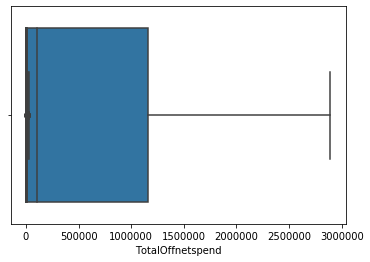

In [50]:
col =['TotalSpendinMonths1and2of2017','TotalDataSpend','TotalDataConsumption',
      'Customertenureinmonth','TotalOnnetspend','TotalOffnetspend']
for i in col:
    Outlier_Imputation(i)

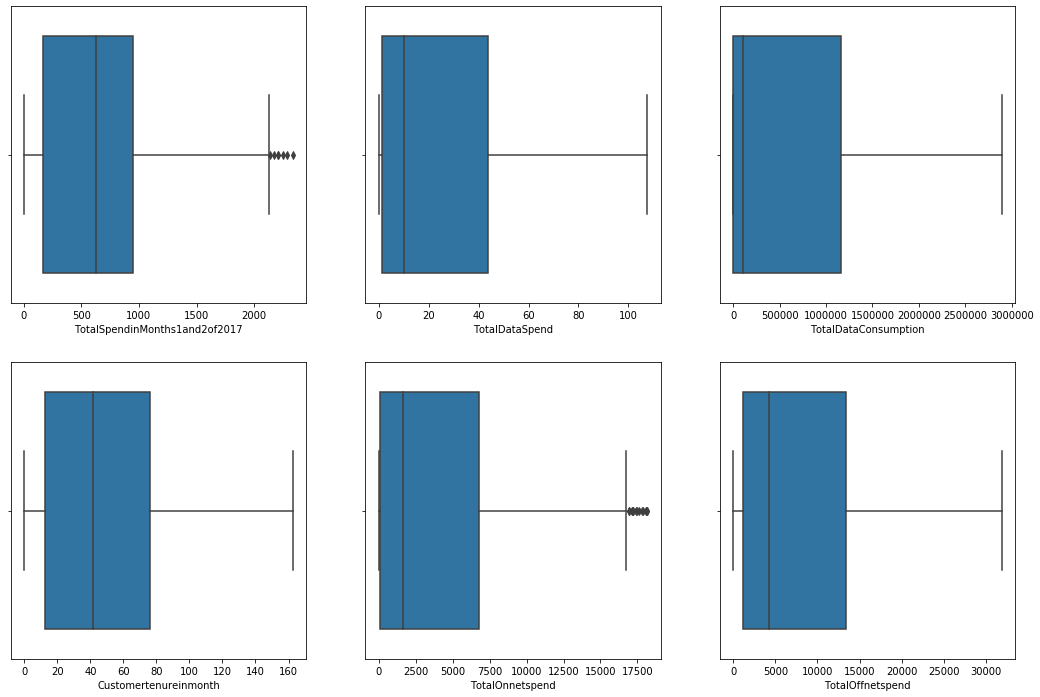

In [52]:
fig, axs = plt.subplots(2,3, figsize = (18,12))

sns.boxplot(data['TotalSpendinMonths1and2of2017'], ax = axs[0][0])
sns.boxplot(data['TotalDataSpend'], ax = axs[0][1])
sns.boxplot(data['TotalDataConsumption'], ax = axs[0][2])

sns.boxplot(data['Customertenureinmonth'], ax = axs[1][0])
sns.boxplot(data['TotalOnnetspend'], ax = axs[1][1])
sns.boxplot(data['TotalOffnetspend'], ax = axs[1][2])


plt.tight_layout
plt.show()

All outliers are imputed

In [54]:
#Remove CustomerID
data2 =data.drop('CustomerID', axis =1)

In [55]:
#One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

data3 = pd.get_dummies(data2)

data3.head()

,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,ChurnStatus,NetworktypesubscriptioninMonth1_2G,NetworktypesubscriptioninMonth1_3G,NetworktypesubscriptioninMonth1_Other,NetworktypesubscriptioninMonth2_2G,NetworktypesubscriptioninMonth2_3G,NetworktypesubscriptioninMonth2_Other,MostLovedCompetitornetworkininMonth1_0,MostLovedCompetitornetworkininMonth1_Mango,MostLovedCompetitornetworkininMonth1_PQza,MostLovedCompetitornetworkininMonth1_ToCall,MostLovedCompetitornetworkininMonth1_Uxaa,MostLovedCompetitornetworkininMonth1_Weematel,MostLovedCompetitornetworkininMonth1_Zintel,MostLovedCompetitornetworkininMonth2_Mango,MostLovedCompetitornetworkininMonth2_PQza,MostLovedCompetitornetworkininMonth2_ToCall,MostLovedCompetitornetworkininMonth2_Uxaa,MostLovedCompetitornetworkininMonth2_Weematel,MostLovedCompetitornetworkininMonth2_Zintel
0,123.0,4.10,76.7140,0.00,1.250000,1.4951,14.0,564.0,6408.0,2.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1316.0,43.87,98.8904,4.14,1.250000,1.0244,27.0,1626.0,4373.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2385.0,79.50,372.6300,3.51,1.250000,6.0898,119.0,10411.0,22039.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1614.0,53.80,530.2000,6.85,1.250000,3.3447,69.0,6822.0,6274.0,1.0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2175.0,72.50,554.1300,6.99,61.382621,673204.0342,33.0,3387.0,7241.0,1.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [56]:
cr = data3.corr()
cr.ChurnStatus

network_age                                     -0.154368
Customertenureinmonth                           -0.147320
TotalSpendinMonths1and2of2017                   -0.093466
TotalSMSSpend                                    0.133885
TotalDataSpend                                  -0.040402
TotalDataConsumption                            -0.136311
TotalUniqueCalls                                -0.133929
TotalOnnetspend                                 -0.127440
TotalOffnetspend                                 0.056861
TotalCallcentrecomplaintcalls                   -0.075808
ChurnStatus                                      1.000000
NetworktypesubscriptioninMonth1_2G               0.002787
NetworktypesubscriptioninMonth1_3G              -0.071972
NetworktypesubscriptioninMonth1_Other            0.081747
NetworktypesubscriptioninMonth2_2G               0.007492
NetworktypesubscriptioninMonth2_3G              -0.076008
NetworktypesubscriptioninMonth2_Other            0.081747
MostLovedCompe

In [58]:
#Correlation
cr=data3.corr(method='pearson')
dep_variables=[[]]

for i in cr.columns:
    val=0
    for j in cr.columns:
        if i!=j:
            if cr[i][j]>=0.8:
                for val in dep_variables:    
                          if ([i,j] not in dep_variables) and (([j,i] not in dep_variables)):
                             dep_variables.append([i,j])
          
del dep_variables[0] #Delete empty list [ ]from this list
dep_variables

[['network_age', 'Customertenureinmonth'],
 ['NetworktypesubscriptioninMonth1_2G', 'NetworktypesubscriptioninMonth2_2G'],
 ['NetworktypesubscriptioninMonth1_3G', 'NetworktypesubscriptioninMonth2_3G'],
 ['NetworktypesubscriptioninMonth1_Other',
  'NetworktypesubscriptioninMonth2_Other']]

Remove highly corelted varibles

In [93]:
del_cols = [col[0] for col in dep_variables]
del_cols

['network_age',
 'NetworktypesubscriptioninMonth1_2G',
 'NetworktypesubscriptioninMonth1_3G',
 'NetworktypesubscriptioninMonth1_Other']

In [95]:
data4=data3.drop(del_cols,axis=1)
data4.head()

,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,ChurnStatus,NetworktypesubscriptioninMonth2_2G,NetworktypesubscriptioninMonth2_3G,NetworktypesubscriptioninMonth2_Other,MostLovedCompetitornetworkininMonth1_0,MostLovedCompetitornetworkininMonth1_Mango,MostLovedCompetitornetworkininMonth1_PQza,MostLovedCompetitornetworkininMonth1_ToCall,MostLovedCompetitornetworkininMonth1_Uxaa,MostLovedCompetitornetworkininMonth1_Weematel,MostLovedCompetitornetworkininMonth1_Zintel,MostLovedCompetitornetworkininMonth2_Mango,MostLovedCompetitornetworkininMonth2_PQza,MostLovedCompetitornetworkininMonth2_ToCall,MostLovedCompetitornetworkininMonth2_Uxaa,MostLovedCompetitornetworkininMonth2_Weematel,MostLovedCompetitornetworkininMonth2_Zintel
0,4.10,76.7140,0.00,1.250000,1.4951,14.0,564.0,6408.0,2.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,43.87,98.8904,4.14,1.250000,1.0244,27.0,1626.0,4373.0,1.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,79.50,372.6300,3.51,1.250000,6.0898,119.0,10411.0,22039.0,1.0,0.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,53.80,530.2000,6.85,1.250000,3.3447,69.0,6822.0,6274.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,72.50,554.1300,6.99,61.382621,673204.0342,33.0,3387.0,7241.0,1.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [124]:
#Data Partition

X = data4.drop('ChurnStatus', axis =1)
y = data4['ChurnStatus']

In [125]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
norm_x = StandardScaler().fit_transform(X)
norm_x=pd.DataFrame(norm_x,columns=X.columns)
norm_x.head()

,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,NetworktypesubscriptioninMonth2_2G,NetworktypesubscriptioninMonth2_3G,NetworktypesubscriptioninMonth2_Other,MostLovedCompetitornetworkininMonth1_0,MostLovedCompetitornetworkininMonth1_Mango,MostLovedCompetitornetworkininMonth1_PQza,MostLovedCompetitornetworkininMonth1_ToCall,MostLovedCompetitornetworkininMonth1_Uxaa,MostLovedCompetitornetworkininMonth1_Weematel,MostLovedCompetitornetworkininMonth1_Zintel,MostLovedCompetitornetworkininMonth2_Mango,MostLovedCompetitornetworkininMonth2_PQza,MostLovedCompetitornetworkininMonth2_ToCall,MostLovedCompetitornetworkininMonth2_Uxaa,MostLovedCompetitornetworkininMonth2_Weematel,MostLovedCompetitornetworkininMonth2_Zintel
0,-1.100287,-1.157146,-0.522158,-0.810213,-0.742438,-0.634398,-0.702314,-0.123713,0.031736,1.802040,-1.056502,-0.557491,-0.165380,-0.416927,-0.558773,-0.411413,1.823113,-0.334564,-0.352726,3.515047,-0.515037,-0.214772,-1.228574,-0.19948,-0.180682
1,-0.141960,-1.110492,-0.451157,-0.810213,-0.742439,-0.592915,-0.454512,-0.396420,-0.387463,1.802040,-1.056502,-0.557491,-0.165380,-0.416927,-0.558773,-0.411413,1.823113,-0.334564,-0.352726,3.515047,-0.515037,-0.214772,-1.228574,-0.19948,-0.180682
2,0.716606,-0.534602,-0.461961,-0.810213,-0.742433,-0.299344,1.595339,1.970975,-0.387463,1.802040,-1.056502,-0.557491,-0.165380,-0.416927,-0.558773,-0.411413,-0.548512,2.988960,-0.352726,3.515047,-0.515037,-0.214772,-1.228574,-0.19948,-0.180682
3,0.097320,-0.203109,-0.404680,-0.810213,-0.742436,-0.458894,0.757898,-0.141670,-0.387463,1.802040,-1.056502,-0.557491,6.046693,-0.416927,-0.558773,-0.411413,-0.548512,-0.334564,-0.352726,3.515047,-0.515037,-0.214772,-1.228574,-0.19948,-0.180682
4,0.547929,-0.152765,-0.402279,1.383099,0.054600,-0.573769,-0.043609,-0.012084,-0.387463,-0.554926,0.946519,-0.557491,-0.165380,-0.416927,-0.558773,-0.411413,-0.548512,2.988960,-0.352726,3.515047,-0.515037,-0.214772,-1.228574,-0.19948,-0.180682


In [126]:
#Data SPlitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(norm_x,y,test_size=0.2,random_state=1)

# Model Training


# Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,y_train)

ytrain_pred = LG.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = LG.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.7461625086625088
RF test roc-auc: 0.7004857737682164


# Linear Discriminant Analysis

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDM=LinearDiscriminantAnalysis()
LDM.fit(X_train,y_train)

ytrain_pred = LDM.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = LDM.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.744941094941095
RF test roc-auc: 0.6971547536433031


# NaiveBayes Classifier


In [144]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB ,BernoulliNB ,CategoricalNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
ytrain_pred = GNB.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = GNB.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.7404582467082467
RF test roc-auc: 0.6979875086745315


# KNN

In [142]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
ytrain_pred = KNN.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = KNN.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.8511239604989606
RF test roc-auc: 0.7255031228313671


# RFC

In [139]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=400, max_depth=10 ,bootstrap= True , criterion= 'entropy')

RFC.fit(X_train,y_train)

ytrain_pred = RFC.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = RFC.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.999692480942481
RF test roc-auc: 0.8977099236641222


# AdaBoostClassifier

In [133]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9468663374913375
Adaboost test roc-auc: 0.89559333795975


No we will focus on selecting the best threshold for maximum accuracy

In [145]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8322692574600971


In [152]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.091194,0.419345,0.489532,0.373737
1,0.164463,0.271576,0.488075,0.313131
2,0.408305,0.282819,0.495967,0.484848
3,0.801359,0.916983,0.511333,0.505051
4,0.838515,0.368343,0.684687,0.383838
...,...,...,...,...
236,0.176196,0.438947,0.488351,0.353535
237,0.876673,0.720489,0.522566,0.585859
238,0.464537,0.534619,0.500482,0.565657
239,0.078315,0.255164,0.473171,0.313131


In [151]:
final_prediction

0      0.343452
1      0.309311
2      0.417985
3      0.683681
4      0.568846
         ...   
236    0.364257
237    0.676397
238    0.516323
239    0.279945
240    0.642471
Length: 241, dtype: float64

In [153]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.8077974 , 0.8077974 , 0.72914934, 0.72278865, 0.66859597,
       0.6683443 , 0.66418755, 0.66270338, 0.64042988, 0.63627698,
       0.63313266, 0.63142222, 0.62630087, 0.62006333, 0.61437023,
       0.60845046, 0.60302504, 0.59758018, 0.5964384 , 0.59641383,
       0.56129652, 0.55774376, 0.55135955, 0.54971105, 0.54095116,
       0.53217007, 0.53030374, 0.52805452, 0.52694328, 0.52557994,
       0.51632343, 0.50339548, 0.49984458, 0.49508036, 0.49031934,
       0.48800802, 0.4863492 , 0.4688914 , 0.46879668, 0.46185759,
       0.45386781, 0.45265464, 0.45188673, 0.45093207, 0.45001261,
       0.44910712, 0.43676038, 0.43661026, 0.43250378, 0.42960088,
       0.42445941, 0.42247768, 0.41798485, 0.41778578, 0.41297064,
       0.40680569, 0.40491303, 0.40448216, 0.40351778, 0.40083996,
       0.39619942, 0.38792971, 0.38774294, 0.38394594, 0.38248464,
       0.38033527, 0.37811282, 0.37013778, 0.36687326, 0.35746993,
       0.35400991, 0.32698483, 0.32687611, 0.32477064, 0.32011

In [154]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
54,0.412971,0.755187
59,0.400840,0.755187
53,0.417786,0.755187
55,0.406806,0.755187
57,0.404482,0.755187


Here best threshold values are in between 0.400840 and 0.417786

In [157]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

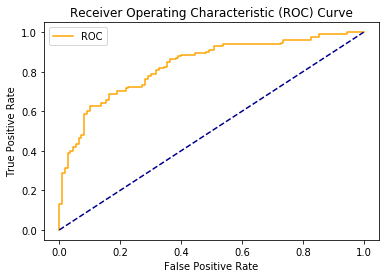

In [158]:
plot_roc_curve(fpr,tpr)

Lets check     important features

Lets test with these features